In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
import folium
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
data = pd.read_excel("../data/external/StateAndCategory.xlsx")

In [3]:
# Looking at the first 10 lines of the dataset 
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17,2019-11-24,2019-12-01,2019-12-08
State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama
Category,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol
Dollars,23611285.0,23220758.0,21770283.0,21956558.0,23183482.0,22305042.0,21752827.0,22163189.0,27789778.0,20495494.0
Unit sales,2974221.0,2895573.0,2730939.0,2764970.0,2872683.0,2787906.0,2715427.0,2765197.0,3220147.0,2592792.0
Volume sales,837930.0,830131.0,762832.0,768366.0,815352.0,768645.0,753569.0,752851.0,960289.0,705014.0
Dollars last year,22449300.0,23314625.0,21070374.0,20188919.0,22565261.0,19889222.0,20079479.0,23787504.0,19623984.0,18933844.0
Unit sales last year,2979065.0,2978312.0,2745973.0,2651957.0,2884813.0,2636924.0,2605810.0,2900939.0,2533266.0,2426579.0
Volume sales last year,815637.0,855363.0,766339.0,713812.0,801717.0,693984.0,681261.0,805853.0,692656.0,652126.0
Dollars 3 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Looking at the last 10 lines of the dataset
data.tail(10).T

,79458,79459,79460,79461,79462,79463,79464,79465,79466,79467
Date,2022-11-13,2022-11-20,2022-11-27,2022-12-04,2022-12-11,2022-12-18,NA = data are not available,Note: The series is subject to revision based ...,"Source: USDA, Economic Research Service calcul...","Data as of December 18, 2022."
State,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,NaN,NaN,NaN,NaN
Category,Vegetables,Vegetables,Vegetables,Vegetables,Vegetables,Vegetables,NaN,NaN,NaN,NaN
Dollars,2303044.0,2602811.0,2479794.0,2100624.0,2251063.0,2348132.0,NaN,NaN,NaN,NaN
Unit sales,1048156.0,1173843.0,1103847.0,936969.0,999933.0,1035860.0,NaN,NaN,NaN,NaN
Volume sales,1702140.0,1913963.0,1738002.0,1432632.0,1542023.0,1692035.0,NaN,NaN,NaN,NaN
Dollars last year,2125903.0,2397439.0,2225316.0,1978026.0,2083215.0,2162981.0,NaN,NaN,NaN,NaN
Unit sales last year,1068511.0,1180841.0,1090546.0,969229.0,1031045.0,1055737.0,NaN,NaN,NaN,NaN
Volume sales last year,1739792.0,1937009.0,1725419.0,1498999.0,1627223.0,1697209.0,NaN,NaN,NaN,NaN
Dollars 3 years ago,1961060.0,2257197.0,2219431.0,1811746.0,1861573.0,2323511.0,NaN,NaN,NaN,NaN


In [5]:
# Removing the last 4 entries because they are just informational
data.drop(data.tail(4).index,
        inplace = True)
data.tail()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
79459,2022-11-20,Wyoming,Vegetables,2602811.0,1173843.0,1913963.0,2397439.0,1180841.0,1937009.0,2257197.0,1207337.0,2049575.0,8.6,-0.6,-1.2,15.3,-2.8,-6.6
79460,2022-11-27,Wyoming,Vegetables,2479794.0,1103847.0,1738002.0,2225316.0,1090546.0,1725419.0,2219431.0,1188227.0,1997316.0,11.4,1.2,0.7,11.7,-7.1,-13.0
79461,2022-12-04,Wyoming,Vegetables,2100624.0,936969.0,1432632.0,1978026.0,969229.0,1498999.0,1811746.0,965439.0,1614865.0,6.2,-3.3,-4.4,15.9,-2.9,-11.3
79462,2022-12-11,Wyoming,Vegetables,2251063.0,999933.0,1542023.0,2083215.0,1031045.0,1627223.0,1861573.0,988900.0,1619299.0,8.1,-3.0,-5.2,20.9,1.1,-4.8
79463,2022-12-18,Wyoming,Vegetables,2348132.0,1035860.0,1692035.0,2162981.0,1055737.0,1697209.0,2323511.0,1179534.0,1959064.0,8.6,-1.9,-0.3,1.1,-12.2,-13.6


In [6]:
# Looking at some of the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [7]:
data.describe()

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
count,7.946400e+04,7.945800e+04,7.224000e+04,7.918700e+04,7.917900e+04,7.198800e+04,2.999600e+04,2.999500e+04,2.726900e+04,79187.000000,79179.000000,71988.000000,29996.000000,29989.000000,27269.00000
mean,3.004220e+07,9.285564e+06,4.346782e+07,2.806284e+07,9.271008e+06,4.261446e+07,2.596150e+07,9.021098e+06,4.024885e+07,7.903934,1.331560,1.585343,23.209221,2.338121,2.87631
std,4.770448e+07,1.510421e+07,1.315261e+08,4.438617e+07,1.509662e+07,1.283242e+08,4.122033e+07,1.480536e+07,1.203044e+08,14.906693,14.578056,16.102667,14.995531,14.386263,16.62808
min,4.941600e+04,4.437000e+03,9.650000e+02,5.002700e+04,4.437000e+03,9.990000e+02,5.002700e+04,4.585000e+03,1.004000e+03,-63.600000,-67.400000,-64.600000,-43.300000,-48.800000,-46.40000
25%,4.396122e+06,1.110472e+06,1.676684e+06,4.121482e+06,1.099937e+06,1.682662e+06,3.813584e+06,1.057744e+06,1.629940e+06,1.000000,-4.700000,-5.700000,15.700000,-3.900000,-4.80000
50%,1.348743e+07,4.212998e+06,6.514509e+06,1.265726e+07,4.191513e+06,6.490956e+06,1.176354e+07,4.070996e+06,6.272329e+06,7.100000,-0.600000,-0.400000,22.600000,1.100000,1.10000
75%,3.537329e+07,1.068737e+07,2.410544e+07,3.320676e+07,1.061359e+07,2.404990e+07,3.062670e+07,1.021851e+07,2.322585e+07,13.300000,5.400000,6.900000,29.825000,6.700000,8.30000
max,6.452044e+08,2.225147e+08,1.730773e+09,6.450795e+08,2.224711e+08,1.730773e+09,4.429971e+08,1.571063e+08,1.569918e+09,880.600000,931.400000,1250.000000,823.600000,828.600000,1081.30000


In [8]:
# Making a copy of the dataset
df = data.copy()

df['Dollars_Converted'] = df['Dollars'].replace(',', '')
df['Dollars_Converted'] = df['Dollars_Converted'].replace('$', '')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [9]:
df['Unit_Converted'] = df['Unit sales'].replace(',', '')

df['Unit_Converted']= df['Unit_Converted'].astype(float)
df['Dollars_Converted'] = df['Dollars_Converted'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79464 entries, 0 to 79463
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            79464 non-null  object 
 1   State                           79464 non-null  object 
 2   Category                        79464 non-null  object 
 3   Dollars                         79464 non-null  float64
 4   Unit sales                      79458 non-null  float64
 5   Volume sales                    72240 non-null  float64
 6   Dollars last year               79187 non-null  float64
 7   Unit sales last year            79179 non-null  float64
 8   Volume sales last year          71988 non-null  float64
 9   Dollars 3 years ago             29996 non-null  float64
 10  Unit sales 3 years ago          29995 non-null  float64
 11  Volume sales 3 years ago        27269 non-null  float64
 12  Percent change dollars 1 year   

In [10]:
df['Price_per_Unit'] = (df['Dollars_Converted'] / df['Unit_Converted'])
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2019-10-06,2019-10-13,2019-10-20,2019-10-27,2019-11-03,2019-11-10,2019-11-17,2019-11-24,2019-12-01,2019-12-08
State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama
Category,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol
Dollars,23611285.0,23220758.0,21770283.0,21956558.0,23183482.0,22305042.0,21752827.0,22163189.0,27789778.0,20495494.0
Unit sales,2974221.0,2895573.0,2730939.0,2764970.0,2872683.0,2787906.0,2715427.0,2765197.0,3220147.0,2592792.0
Volume sales,837930.0,830131.0,762832.0,768366.0,815352.0,768645.0,753569.0,752851.0,960289.0,705014.0
Dollars last year,22449300.0,23314625.0,21070374.0,20188919.0,22565261.0,19889222.0,20079479.0,23787504.0,19623984.0,18933844.0
Unit sales last year,2979065.0,2978312.0,2745973.0,2651957.0,2884813.0,2636924.0,2605810.0,2900939.0,2533266.0,2426579.0
Volume sales last year,815637.0,855363.0,766339.0,713812.0,801717.0,693984.0,681261.0,805853.0,692656.0,652126.0
Dollars 3 years ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Although this information is highly useful, in order to identify pricing trends, we must view it from the standpoint of pricing the individual units. 

In [11]:
# Checking for missing values
df.isnull().sum()

Date                                  0
State                                 0
Category                              0
Dollars                               0
Unit sales                            6
Volume sales                       7224
Dollars last year                   277
Unit sales last year                285
Volume sales last year             7476
Dollars 3 years ago               49468
Unit sales 3 years ago            49469
Volume sales 3 years ago          52195
Percent change dollars 1 year       277
Percent change units 1 year         285
Percent change volume 1 year       7476
Percent change dollars 3 years    49468
Percent change units 3 years      49475
Percent change volume 3 years     52195
Dollars_Converted                     0
Unit_Converted                        6
Price_per_Unit                        6
dtype: int64

In [12]:
df['Volume sales'] = df['Volume sales'].fillna(df['Volume sales'].mean())

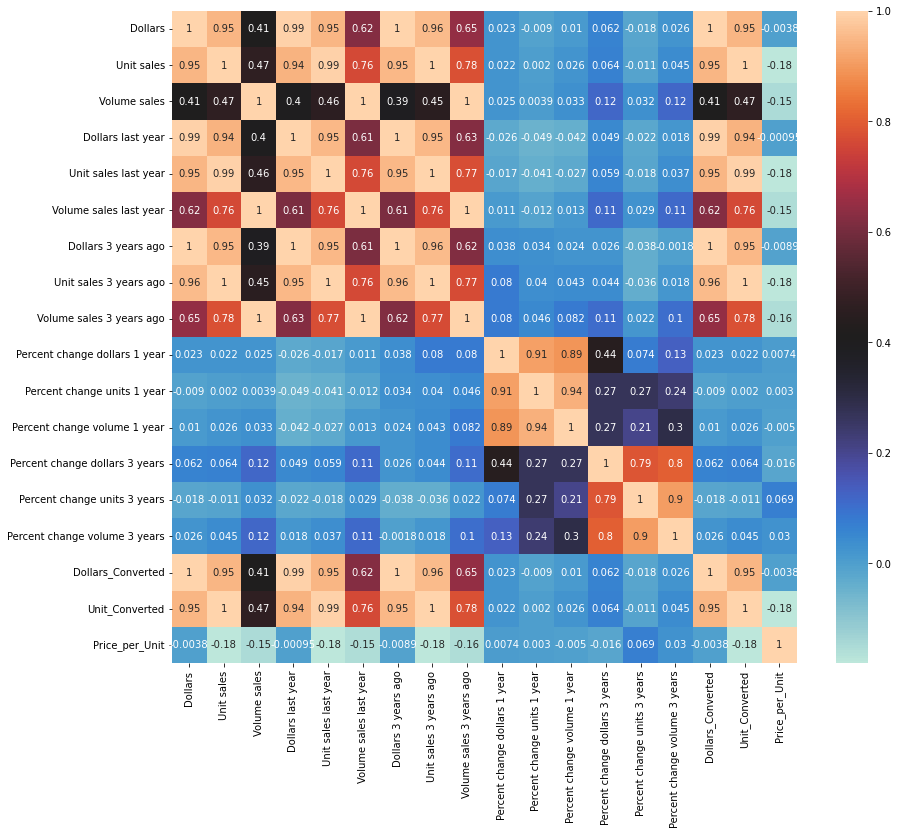

In [13]:
# The Correlation Heatmap
fig = plt.figure(figsize= (14,12))
sns.heatmap(df.corr(),cmap="icefire", annot=True)
plt.show()

In [14]:
# Identify the pairs that has a correlation of more than 0.5 in absolute value.
corr_matrix = df.corr().abs()
threshold_corr = corr_matrix[corr_matrix > 0.50]
threshold_corr

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit
Dollars,1.000000,0.949173,NaN,0.993370,0.946436,0.622506,0.996091,0.956567,0.648916,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.949173,NaN
Unit sales,0.949173,1.000000,NaN,0.942555,0.993841,0.762222,0.951292,0.996962,0.778305,NaN,NaN,NaN,NaN,NaN,NaN,0.949173,1.000000,NaN
Volume sales,NaN,NaN,1.000000,NaN,NaN,0.995916,NaN,NaN,0.996509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dollars last year,0.993370,0.942555,NaN,1.000000,0.950264,0.612423,0.996702,0.950017,0.625361,NaN,NaN,NaN,NaN,NaN,NaN,0.993370,0.942555,NaN
Unit sales last year,0.946436,0.993841,NaN,0.950264,1.000000,0.762373,0.951309,0.997209,0.769712,NaN,NaN,NaN,NaN,NaN,NaN,0.946436,0.993841,NaN
Volume sales last year,0.622506,0.762222,0.995916,0.612423,0.762373,1.000000,0.611366,0.762677,0.997076,NaN,NaN,NaN,NaN,NaN,NaN,0.622506,0.762222,NaN
Dollars 3 years ago,0.996091,0.951292,NaN,0.996702,0.951309,0.611366,1.000000,0.955239,0.618294,NaN,NaN,NaN,NaN,NaN,NaN,0.996091,0.951292,NaN
Unit sales 3 years ago,0.956567,0.996962,NaN,0.950017,0.997209,0.762677,0.955239,1.000000,0.768829,NaN,NaN,NaN,NaN,NaN,NaN,0.956567,0.996962,NaN
Volume sales 3 years ago,0.648916,0.778305,0.996509,0.625361,0.769712,0.997076,0.618294,0.768829,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.648916,0.778305,NaN
Percent change dollars 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.908295,0.892522,NaN,NaN,NaN,NaN,NaN,NaN


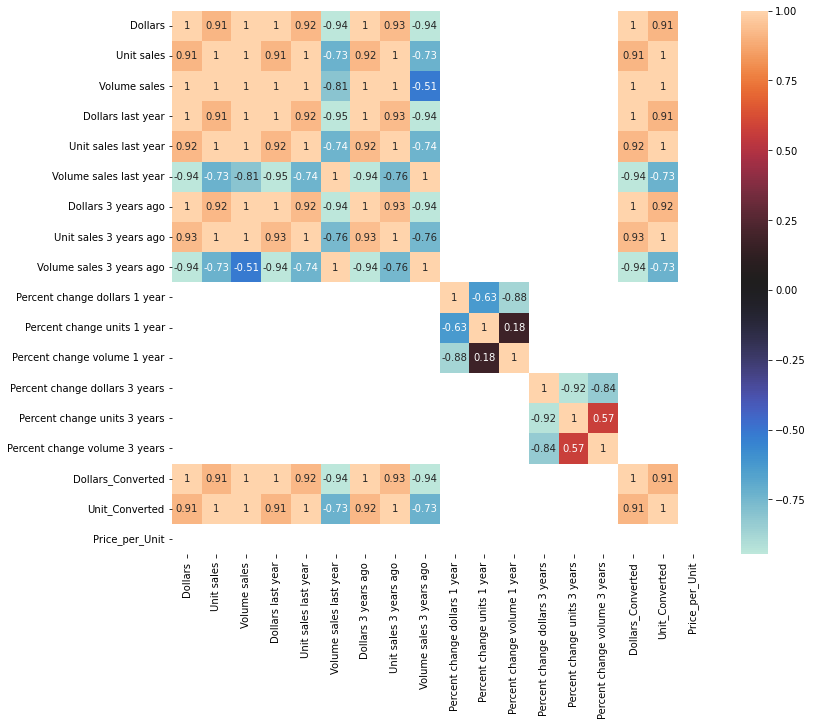

In [15]:
# The Correlation Heatmap of more than 0.5 in absolute value.
fig = plt.figure(figsize= (12,10))
sns.heatmap(threshold_corr.corr(),cmap="icefire", annot=True)
plt.show()

In [16]:
#The numeric variables 
num_cols = [col for col in data.columns if data[col].dtypes != "O"]

In [17]:
# For loop using numeric variables to display a boxplot
def graphs(dataframe):
    
    for col in num_cols:
        
        sns.boxplot(x= data[col]);
        
        plt.show()

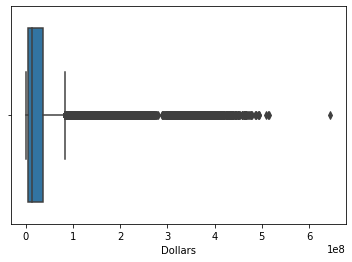

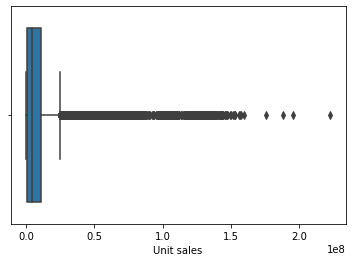

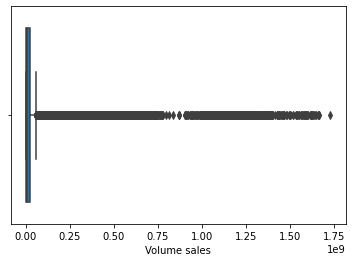

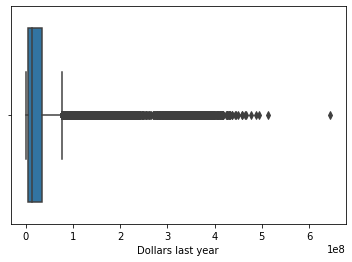

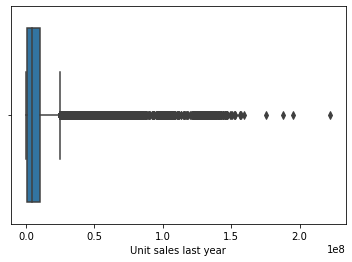

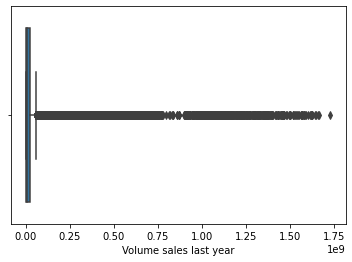

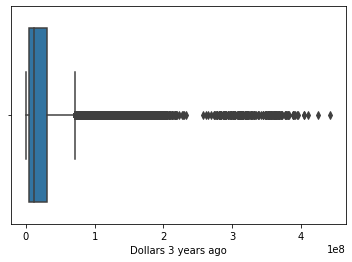

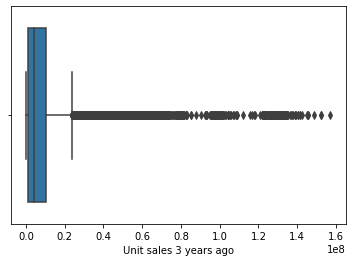

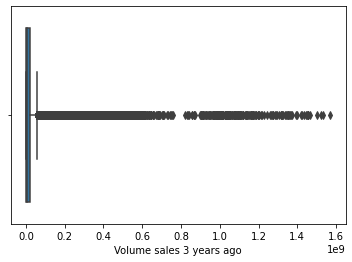

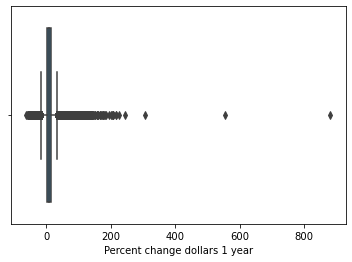

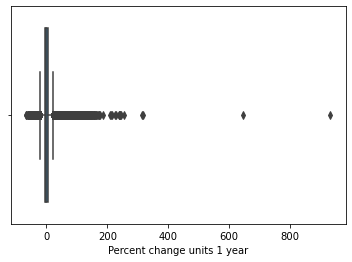

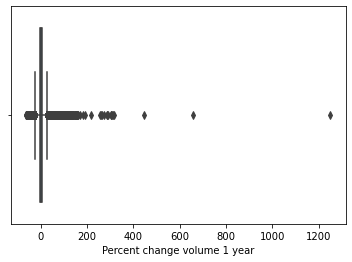

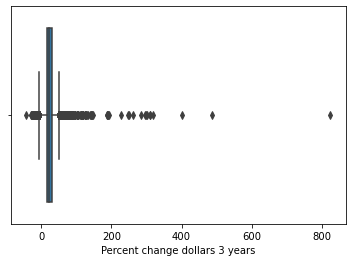

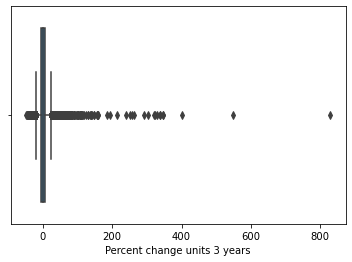

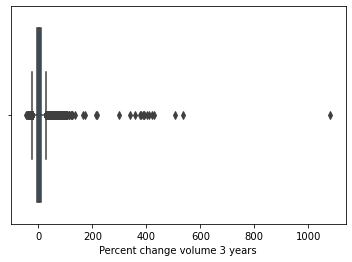

In [18]:
graphs(data)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

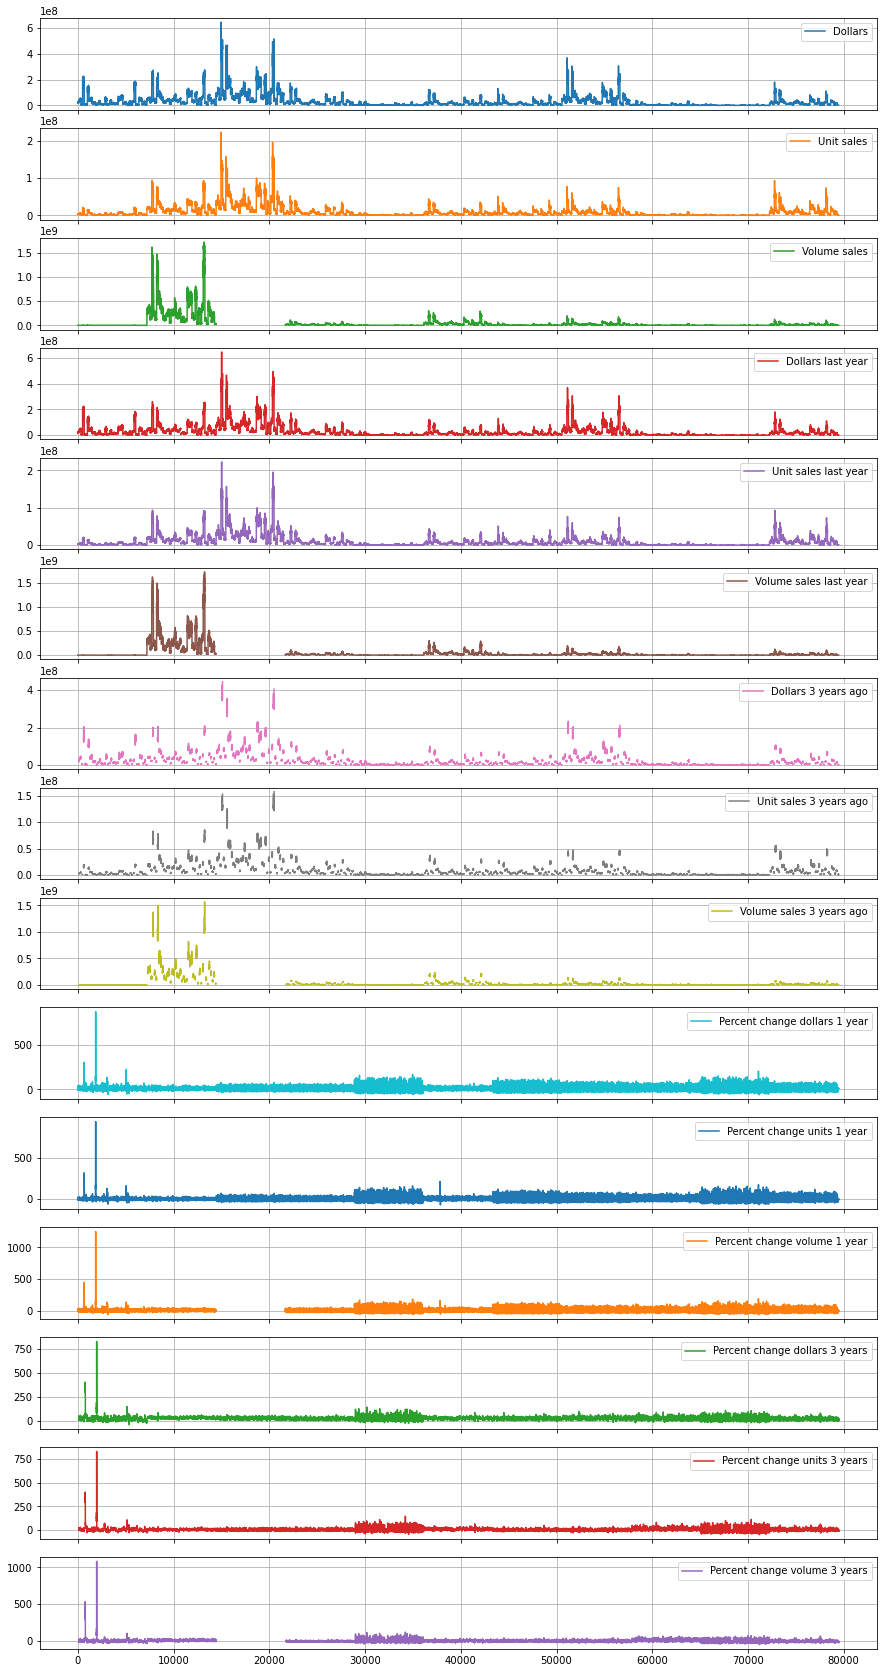

In [19]:
data.plot(subplots=True, grid=True, figsize=(15,30))

After looking at the plots above, I can see that all the plots after the percent change dollars 1 year there isn't much difference in most of the graphs so I would probably not the these variables for any futher analysis. 

In [20]:
# Looking at the value counts of Catergory variable
data.Category.value_counts()

Alcohol                        7224
Beverages                      7224
Commercially prepared items    7224
Dairy                          7224
Fats and oils                  7224
Fruits                         7224
Grains                         7224
Meats, eggs, and nuts          7224
Other                          7224
Sugar and sweeteners           7224
Vegetables                     7224
Name: Category, dtype: int64

In [21]:
# Efficient way to extract year from string format date
df_2020 = df.loc[df['Date'].str.contains('2020', case = False)]
df_2021 = df.loc[df['Date'].str.contains('2021', case = False)]
df_2022 = df.loc[df['Date'].str.contains('2022', case = False)]
df_2023 = df.loc[df['Date'].str.contains('2023', case = False)]

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

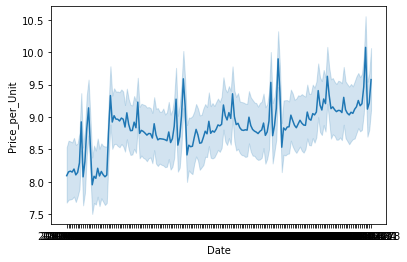

In [22]:
df_Alcohol = df[(df['Category'] == 'Alcohol')]
sns.lineplot(data = df_Alcohol, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

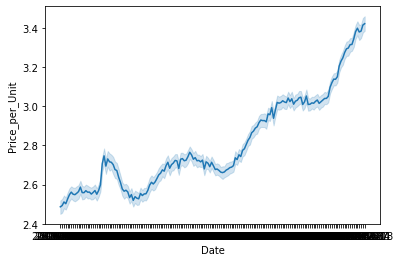

In [23]:
df_Beverages = df[(df['Category'] == 'Beverages')]
sns.lineplot(data = df_Beverages, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

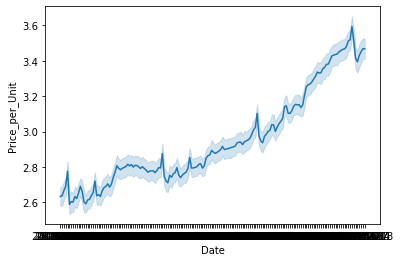

In [24]:
df_Commercial = df[(df['Category'] == 'Commercially prepared items')]
sns.lineplot(data = df_Commercial, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

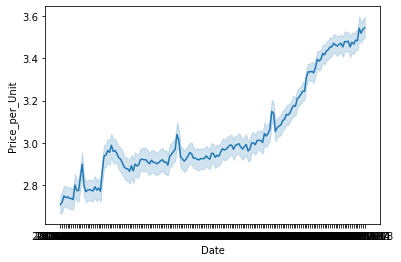

In [25]:
df_Dairy = df[(df['Category'] == 'Dairy')]
sns.lineplot(data = df_Dairy, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

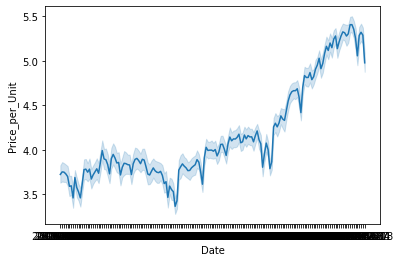

In [26]:
df_Fats_Oil = df[(df['Category'] == 'Fats and oils')]
sns.lineplot(data = df_Fats_Oil, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

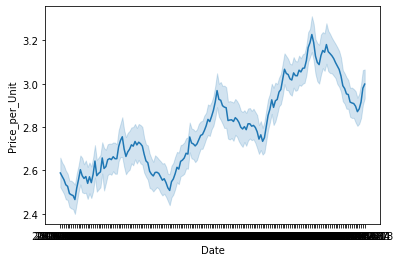

In [27]:
df_Fruit = df[(df['Category'] == 'Fruits')]
sns.lineplot(data = df_Fruit, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

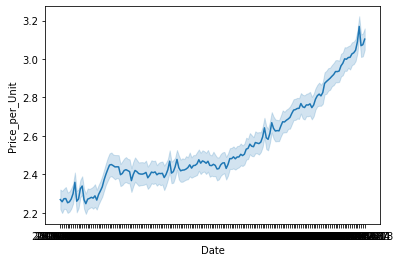

In [28]:
df_Grain = df[(df['Category'] == 'Grains')]
sns.lineplot(data = df_Grain, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

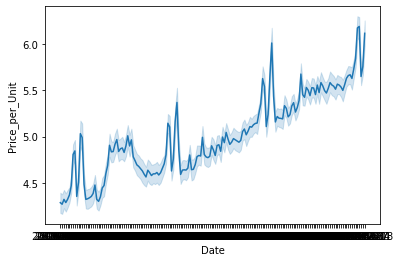

In [29]:
df_Meats_etc = df[(df['Category'] == 'Meats, eggs, and nuts')]
sns.lineplot(data = df_Meats_etc, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

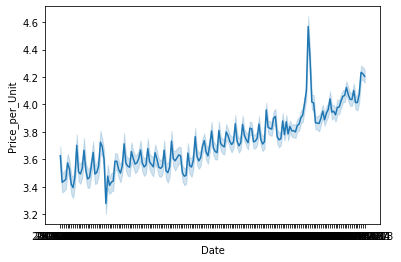

In [30]:
df_Others = df[(df['Category'] == 'Other')]
sns.lineplot(data = df_Others, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

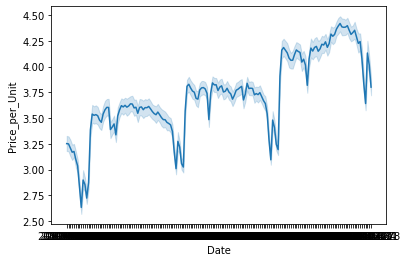

In [31]:
df_Sweetness = df[(df['Category'] == 'Sugar and sweeteners')]
sns.lineplot(data = df_Sweetness, x = "Date", y = "Price_per_Unit")

<AxesSubplot:xlabel='Date', ylabel='Price_per_Unit'>

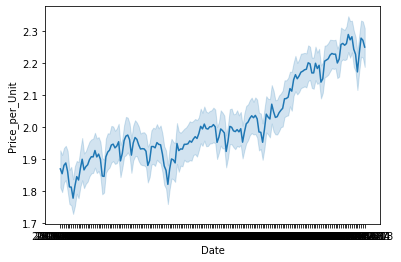

In [32]:
df_Veggies = df[(df['Category'] == 'Vegetables')]
sns.lineplot(data = df_Veggies, x = "Date", y = "Price_per_Unit")

To observe if there is a distinct general pattern of market decline, I believe it would be highly instructive to overlay all of these line charts. Let's plot each year to see if the tendencies continue over time.

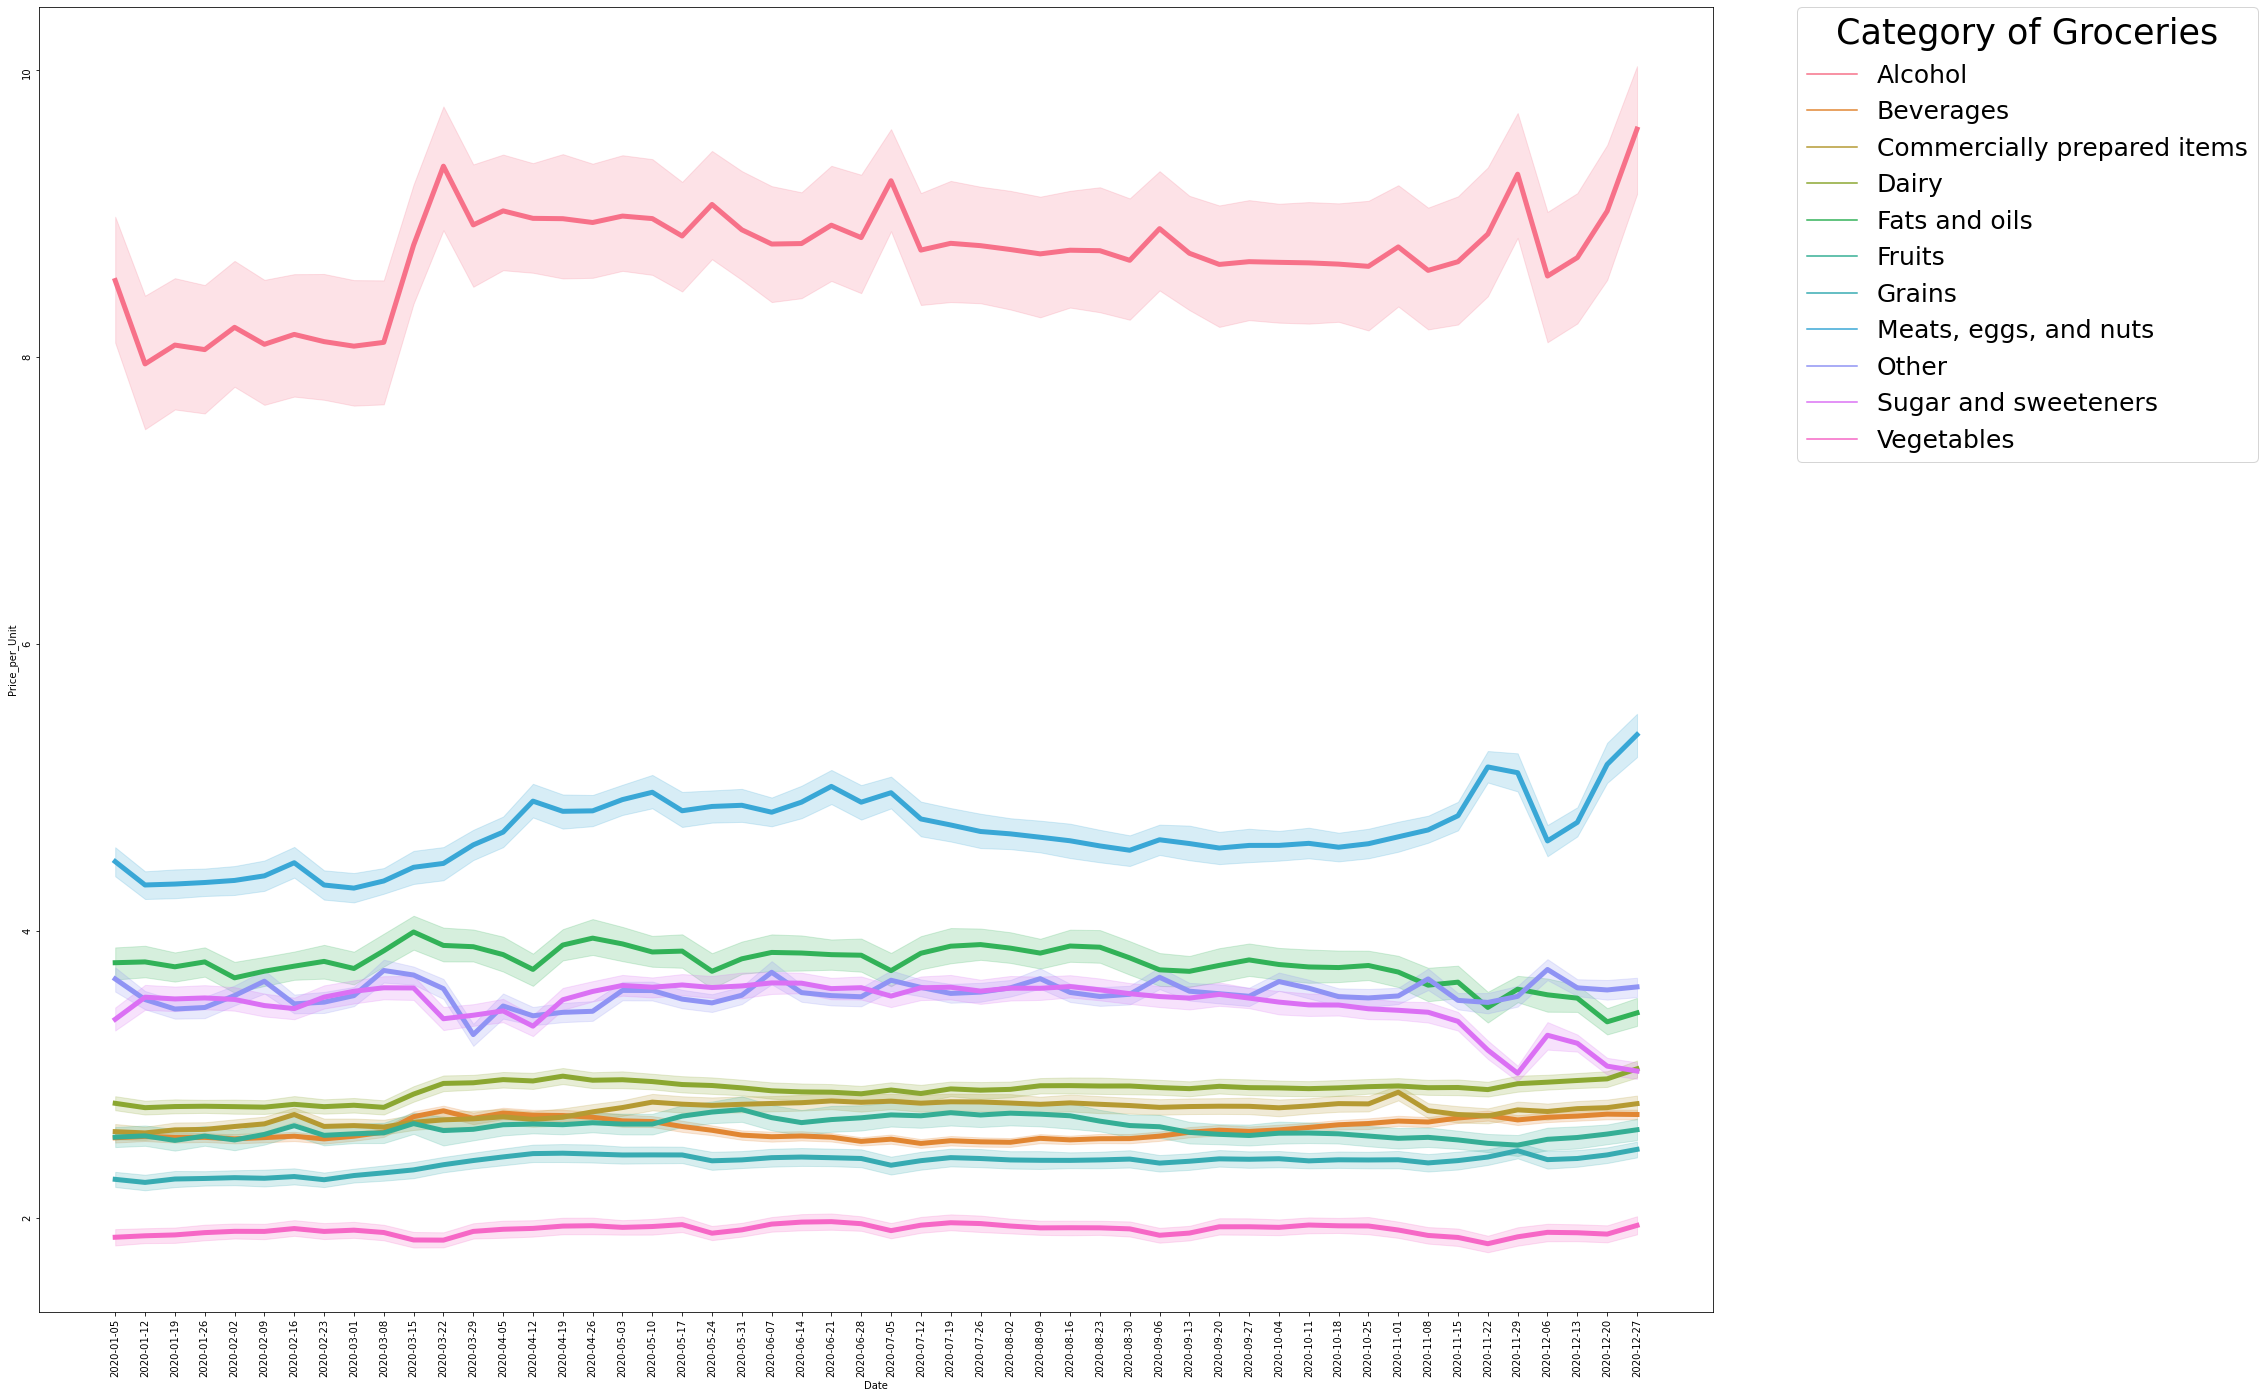

In [33]:
# The year 2020 
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2020, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad = 0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')
leg.get_lines()
ax.tick_params(rotation = 90)
plt.show()

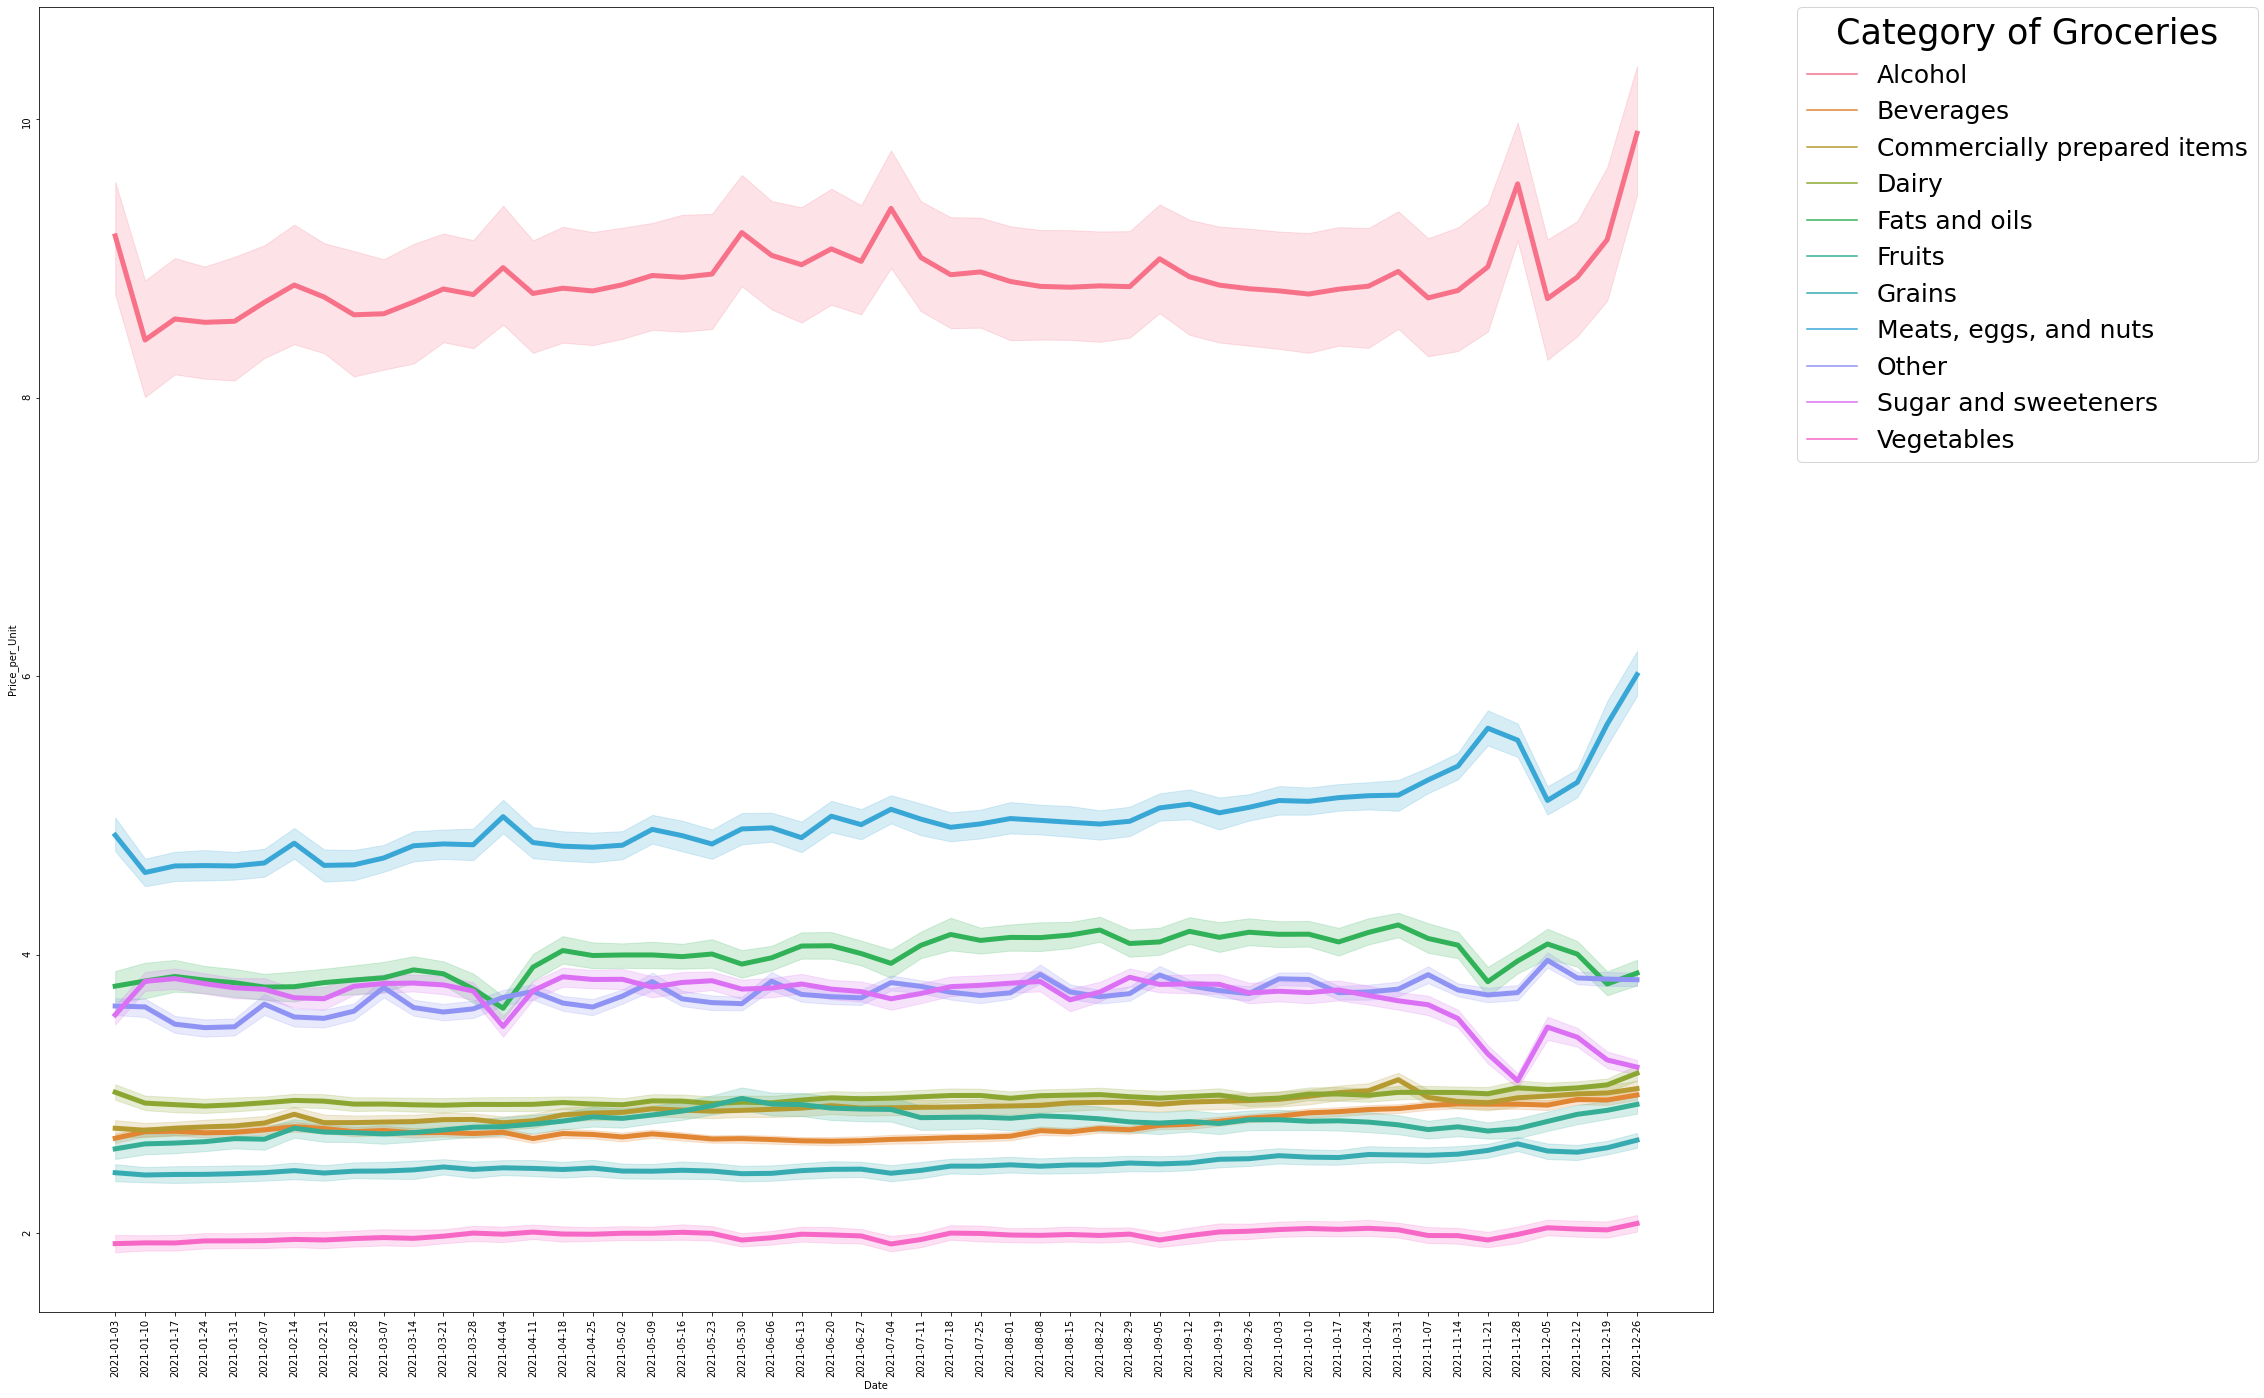

In [34]:
# The year 2021
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2021, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

ax.tick_params(rotation = 90)
plt.show()

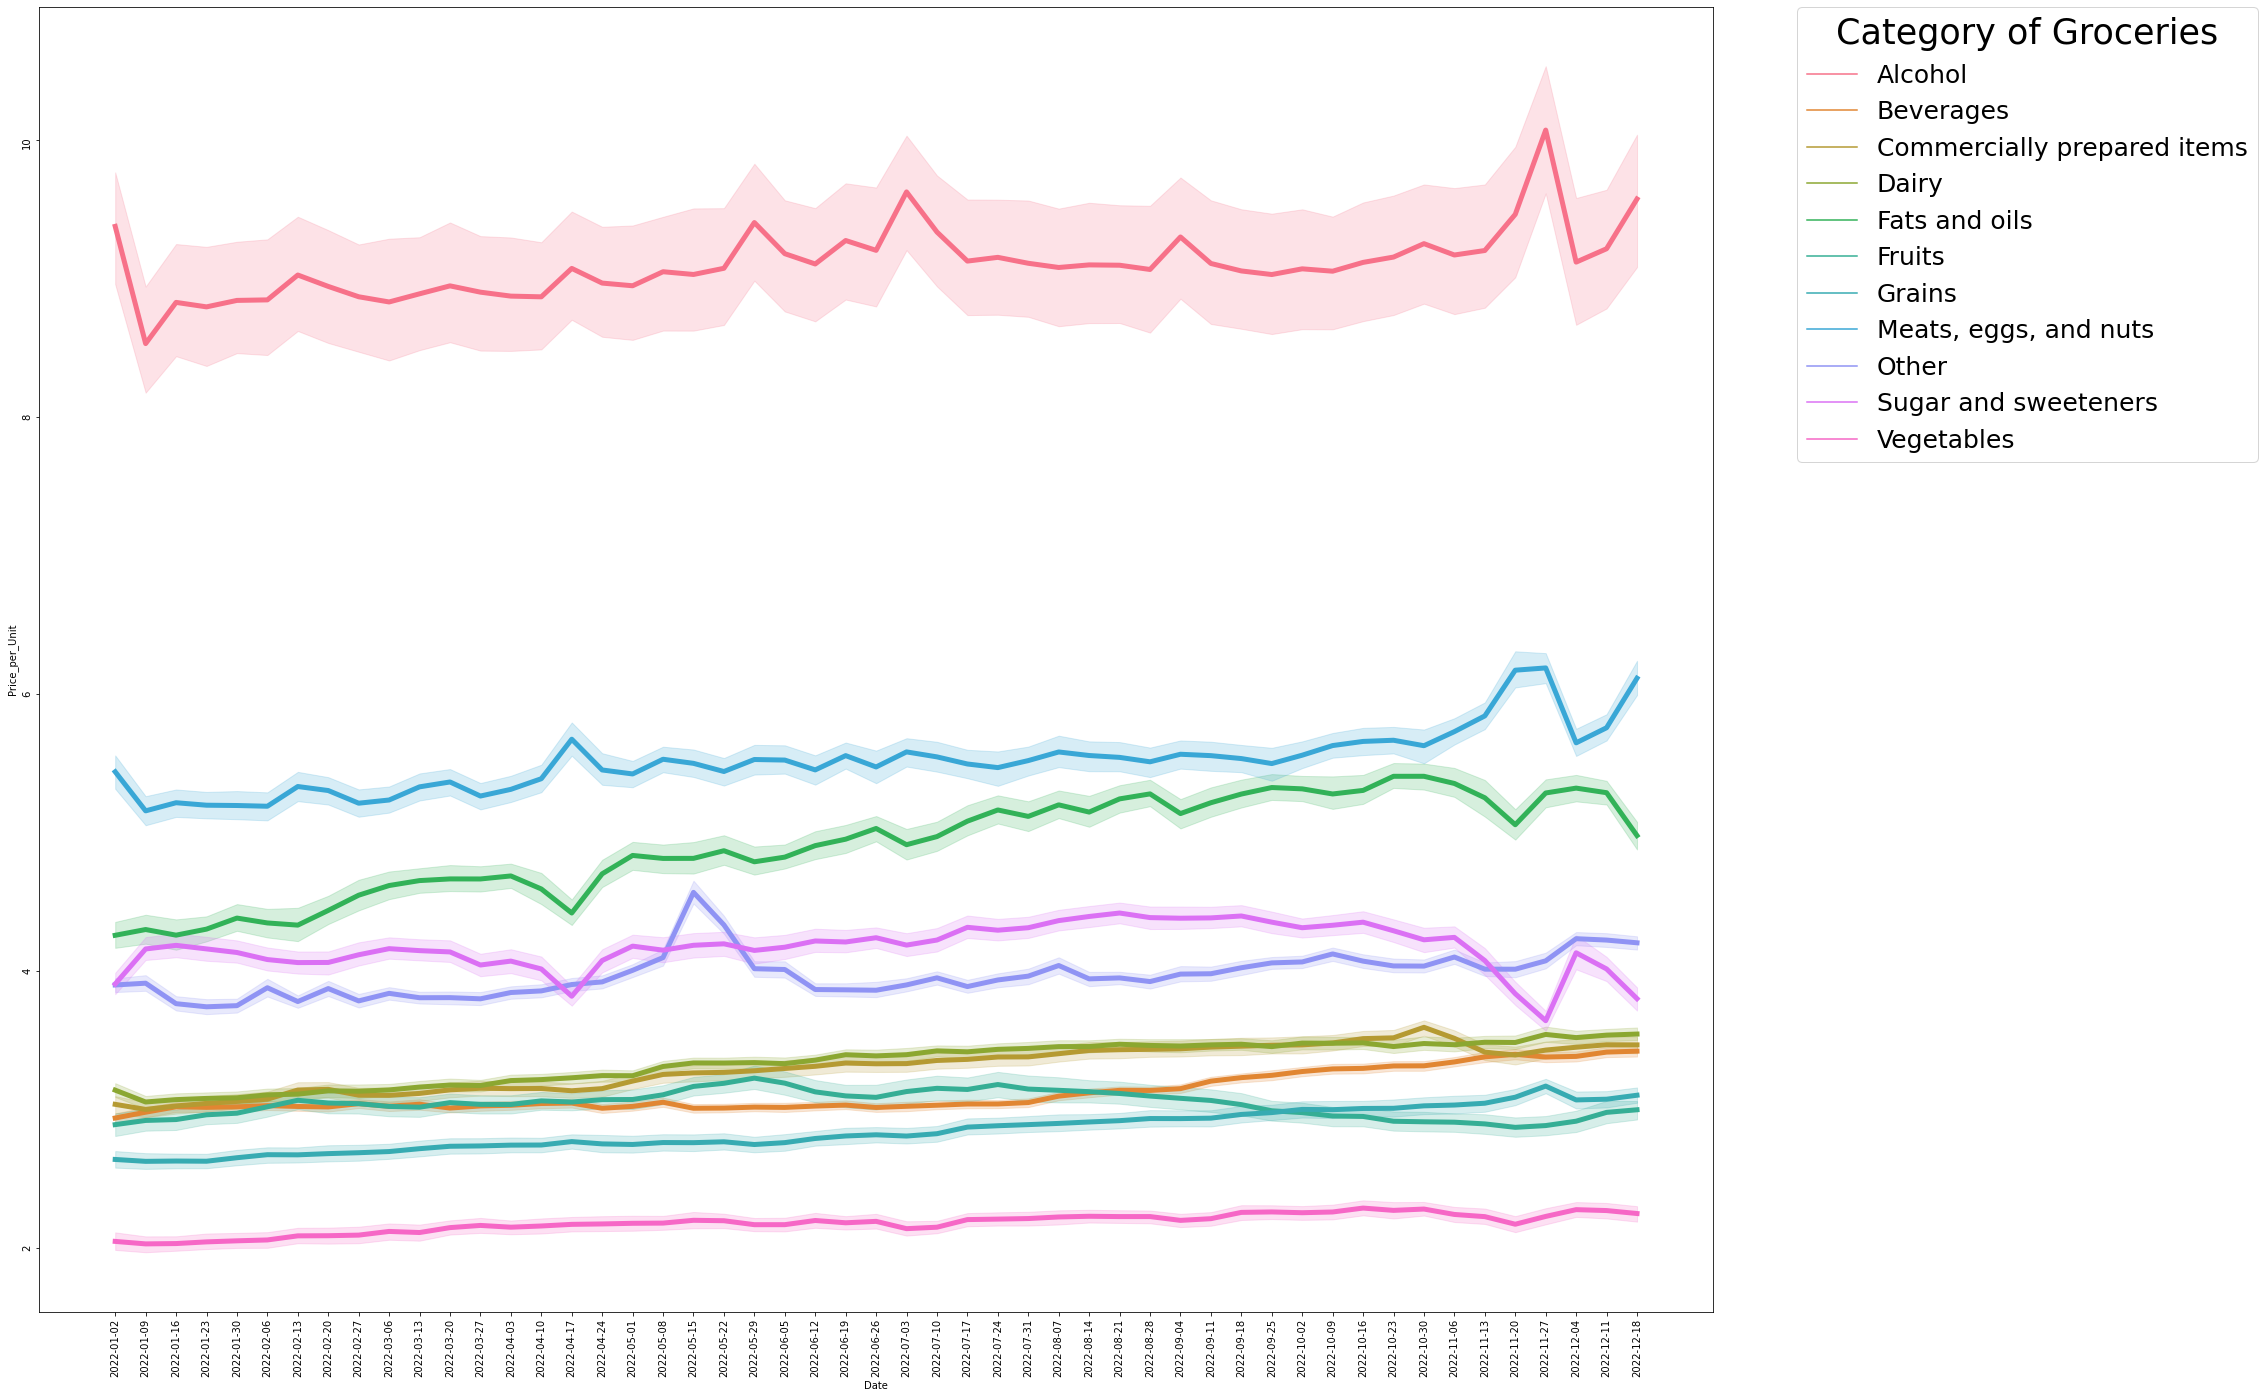

In [35]:
# The year 2022
fig = plt.figure(figsize= (30,24))
ax = sns.lineplot(data=df_2022, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

ax.tick_params(rotation = 90)
plt.show()

In [36]:
# The year 2023
#fig = plt.figure(figsize= (30,24))
#ax = sns.lineplot(data=df_2023, x = "Date", y = "Price_per_Unit", hue = 'Category', lw = 5 )


#leg = plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0,
#           title = 'Category of Groceries', fontsize = '25', title_fontsize = '35')

#ax.tick_params(rotation = 90)
#plt.show()

This is great, really! I can plainly see that the price fluctuations on the red, blue, green, purple, and pink lines over time are clear-cut and noticeable. 

In [37]:
state = list(set(df['State']))
cat = list(df['Category'])
df.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,...,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,837930.0,22449300.0,2979065.0,815637.0,NaN,...,NaN,5.2,-0.2,2.7,NaN,NaN,NaN,23611285.0,2974221.0,7.938645
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,830131.0,23314625.0,2978312.0,855363.0,NaN,...,NaN,-0.4,-2.8,-2.9,NaN,NaN,NaN,23220758.0,2895573.0,8.019400
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,762832.0,21070374.0,2745973.0,766339.0,NaN,...,NaN,3.3,-0.5,-0.5,NaN,NaN,NaN,21770283.0,2730939.0,7.971721
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,768366.0,20188919.0,2651957.0,713812.0,NaN,...,NaN,8.8,4.3,7.6,NaN,NaN,NaN,21956558.0,2764970.0,7.940975
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,815352.0,22565261.0,2884813.0,801717.0,NaN,...,NaN,2.7,-0.4,1.7,NaN,NaN,NaN,23183482.0,2872683.0,8.070324


In [38]:
Year_Month = [i.split(" ")[0][:-3] for i in  list(df['Date'])]
Year = [i.split(" ")[0][0:4] for i in  list(df['Date'])]
Month = [i.split(" ")[0][5:7] for i in  list(df['Date'])]


df['Year'] = Year
df['Month'] = Month
df['Year_Month'] = Year_Month

# Create a monthly dataframe
df_month = df.groupby(['State', 'Category', 'Year']).mean()


df_month.head()

Dollars    Unit sales  Volume sales  \
State   Category  Year                                             
Alabama Alcohol   2019  2.293924e+07  2.822996e+06  7.861141e+05   
                  2020  2.536893e+07  2.966790e+06  8.466995e+05   
                  2021  2.526778e+07  2.909018e+06  7.967640e+05   
                  2022  2.577376e+07  2.913789e+06  7.783465e+05   
        Beverages 2019  4.008188e+07  1.751455e+07  2.523039e+08   

                        Dollars last year  Unit sales last year  \
State   Category  Year                                            
Alabama Alcohol   2019       2.122518e+07          2.698444e+06   
                  2020       2.252879e+07          2.817294e+06   
                  2021       2.536893e+07          2.966790e+06   
                  2022       2.521041e+07          2.906628e+06   
        Beverages 2019       3.853487e+07          1.725119e+07   

                        Volume sales last year  Dollars 3 years ago  \
State   Category  Year                                                
Alabama Alcohol   2019            7.385722e+05                  NaN   
                  2020            7.900623e+05                  NaN   
                  2021            8.466995e+05         2.122518e+07   
                  2022            7.965527e+05         2.247645e+07   
        Beverages 2019            2.417340e+08                  NaN   

                        Unit sales 3 years ago  Volume sales 3 years ago  \
State   Category  Year                                                     
Alabama Alcohol   2019                     NaN                       NaN   
                  2020                     NaN                       NaN   
                  2021            2.698444e+06             738572.153846   
                  2022            2.815581e+06             789587.411765   
        Beverages 2019                     NaN                       NaN   

                        Percent change dollars 1 year  \
State   Category  Year                                  
Alabama Alcohol   2019                       8.530769   
                  2020                      12.694231   
                  2021                       0.290385   
                  2022                       2.243137   
        Beverages 2019                       4.100000   

                        Percent change units 1 year  \
State   Category  Year                                
Alabama Alcohol   2019                     4.953846   
                  2020                     5.436538   
                  2021                    -1.575000   
                  2022                     0.276471   
        Beverages 2019                     1.653846   

                        Percent change volume 1 year  \
State   Category  Year                                 
Alabama Alcohol   2019                      6.946154   
                  2020                      7.344231   
                  2021                     -5.269231   
                  2022                     -2.282353   
        Beverages 2019                      4.553846   

                        Percent change dollars 3 years  \
State   Category  Year                                   
Alabama Alcohol   2019                             NaN   
                  2020                             NaN   
                  2021                       19.630769   
                  2022                       14.905882   
        Beverages 2019                             NaN   

                        Percent change units 3 years  \
State   Category  Year                                 
Alabama Alcohol   2019                           NaN   
                  2020                           NaN   
                  2021                      8.161538   
                  2022                      3.643137   
        Beverages 2019                           NaN   

                        Percent change volume 3 years  Dollars_Converted

In [39]:
df.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,...,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,Dollars_Converted,Unit_Converted,Price_per_Unit,Year,Month,Year_Month
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,837930.0,22449300.0,2979065.0,815637.0,NaN,...,2.7,NaN,NaN,NaN,23611285.0,2974221.0,7.938645,2019,10,2019-10
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,830131.0,23314625.0,2978312.0,855363.0,NaN,...,-2.9,NaN,NaN,NaN,23220758.0,2895573.0,8.019400,2019,10,2019-10
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,762832.0,21070374.0,2745973.0,766339.0,NaN,...,-0.5,NaN,NaN,NaN,21770283.0,2730939.0,7.971721,2019,10,2019-10
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,768366.0,20188919.0,2651957.0,713812.0,NaN,...,7.6,NaN,NaN,NaN,21956558.0,2764970.0,7.940975,2019,10,2019-10
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,815352.0,22565261.0,2884813.0,801717.0,NaN,...,1.7,NaN,NaN,NaN,23183482.0,2872683.0,8.070324,2019,11,2019-11


In [40]:
# Setting variables in the next line of code
state = list(set(df['Category']))
district = state

In [54]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(state)).as_hex())

fig = go.Figure()
for d,p in zip(district, pal):
    fig.add_trace(go.Line(x = df[df['Category']==d]['Date'],
                             y = df[df['Category']==d]['Price_per_Unit'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




    From this we can say there is a "Best time" to buy products:

    Sugar/Sweet, Fruits, Fats and Oils are best time to buy around Holidays.
    Dairy around Christmas time.

    Beverages are cheapest in the summer.

    Vegetables are best to buy around March and September.

    Alcohol, Grains, Meats, Eggs, and Nuts all year long. 

    Commercially prepared food does follow a 6-week cycle.

In [42]:
# Northern states all grocery categories
north = df[((df['State'] == 'New York') | (df['State'] == 'Connecticut') | (df['State'] == 'Illinois') | 
             (df['State'] == 'Indiana') | (df['State'] == 'Iowa') | (df['State'] == 'Maine') | 
             (df['State'] == 'Massachusetts') | (df['State'] == 'Michigan') | (df['State'] == 'Minnesota') | 
             (df['State'] == 'New Hampshire') | (df['State'] == 'New Jersey') | (df['State'] == 'North Dakota') | 
             (df['State'] == 'Ohio') | (df['State'] == 'Pennsylvania') | (df['State'] == 'Rhode Island') | 
             (df['State'] == 'Vermont') | (df['State'] == 'Wisconsin'))]

In [43]:
# Southern states all grocery categories
south = df[((df['State'] == 'Alabama') | (df['State'] == 'Arkansas') | (df['State'] == 'Delaware') | (df['State'] == 'Florida') | (df['State'] == 'Georgia') | (df['State'] == 'Kentucky') |
          (df['State'] == 'Louisiana') | (df['State'] == 'Maryland') | (df['State'] == 'Mississippi') | (df['State'] == 'North Carolina') | (df['State'] == 'Oklahoma') | (df['State'] == 'South Carolina') |
          (df['State'] == 'Tennessee') | (df['State'] == 'Texas') | (df['State'] == 'Virginia') | (df['State'] == 'West Virginia'))]

In [44]:
north_tot = df['Unit_Converted'].sum()
south_tot = df['Unit_Converted'].sum()

north_tot
south_tot

737812324416.0

In [45]:
full_north = north['Unit_Converted'].sum()
full_south = south['Unit_Converted'].sum()

In [46]:
full_north 

232952361272.0

In [47]:
full_south

322293042746.0

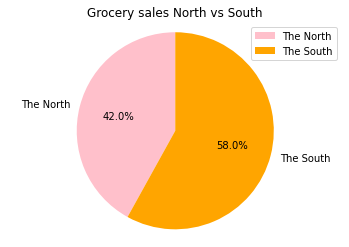

In [48]:
labels= ['The North', 'The South']

colors=['pink', 'orange']

totals= [full_north, full_south]

plt.pie(totals, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(labels)
plt.title("Grocery sales North vs South")
plt.axis('equal')

plt.show()

From this pie chart it is very obvious that the South buy more products than the North. My hypothesis is that due to south having the two largest states Texas and Florida they have the largest population in the united states which is why the South has higher grocey sale. 

In [49]:
# Focuing only on data for TN
df.drop(df.index[df['State'] != 'Tennessee'], inplace=True)

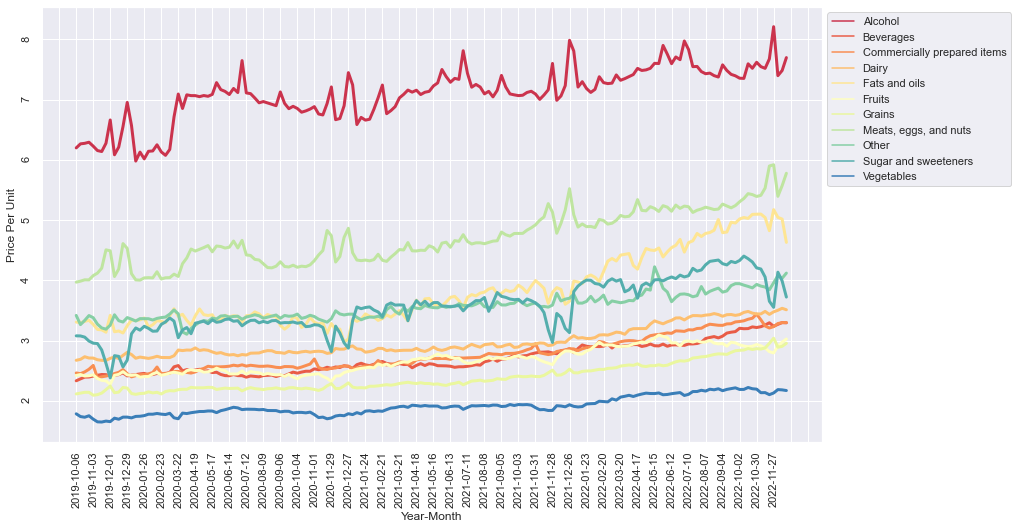

In [50]:
# Showcasing Tennessee price per unit sales throughout the three years utilizing ticker import
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data = df, x = "Date", y = "Price_per_Unit",
                  hue = 'Category', palette = 'Spectral',
                  legend = 'full', lw = 3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Price Per Unit')
plt.xlabel('Year-Month')
ax.tick_params(rotation = 90)
plt.show()

In [51]:
sale_data = data.groupby(['State', 'Category'])['Unit sales'].sum().reset_index()

In [52]:
sale_data

,State,Category,Unit sales
0,Alabama,Alcohol,4.908442e+08
1,Alabama,Beverages,3.179999e+09
2,Alabama,Commercially prepared items,4.957565e+09
3,Alabama,Dairy,9.158652e+08
4,Alabama,Fats and oils,1.325570e+08
...,...,...,...
468,Wyoming,Grains,8.585405e+07
469,Wyoming,"Meats, eggs, and nuts",1.659511e+08
470,Wyoming,Other,2.077331e+07
471,Wyoming,Sugar and sweeteners,5.889917e+06


In [53]:
px.bar(sale_data, x='State', y='Unit sales', color='Category')

So, we can clearly see that from all the sates present larger states such as California, Texas, and Florida have the highest unit sales in all the grocery categories. The most selling produc from all these states is definitely commercially prepared items and beverages.